In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime 
from IPython.display import display, HTML, clear_output

In [2]:
# Just to have each print in the same row
def how_to_print(how):
    CSS = '''
    .output {
        '''+'flex-direction: {};'.format(how)+'''
    }
    '''

    HTML('<style>{}</style>'.format(CSS))

pd.set_option('display.max_rows', 150)
    
how_to_print('row')  

In [3]:
r'''
dataset2018: *trusted_data* with actual ocupacion included.
    path: r'C:\Users\ing_l\Tesis grado\Data\dataset2018.csv'
    
dataset_webscraping: (DataFrame) data with the corresponding operacion (Entrada/Salida).
    path: C:\Users\ing_l\Tesis grado\Data\SUMO_data_w_operacion.csv

dataset2019: all sumo data with ocupation (requested in sumo office)
'''

dataset2018_path = r'C:\Users\ing_l\Tesis grado\Data\dataset_2018.csv'
dataset_webscraping_path = r'C:\Users\ing_l\Tesis grado\Data\dataset_webscraping.csv'
dataset2019_path = r'C:\Users\ing_l\Tesis grado\Data\dataset_2019.csv'

In [4]:
dataset2018 = pd.read_csv(dataset2018_path)[['id_cuadra', 'direccion', 'fecha', 'tiempo', 'operacion', 'ocupacion', 'latitud', 'longitud']]
dataset2018 = dataset2018.loc[dataset2018.id_cuadra != 1]
dataset2018['dia de la semana'] = -1
dataset2018.columns.names = ['dataset2018']

dataset_ws = pd.read_csv(dataset_webscraping_path)[['id_cuadra', 'direccion', 'fecha', 'tiempo', 'operacion', 'ocupacion', 'latitud', 'longitud']]
dataset_ws['dia de la semana'] = -1
dataset_ws.columns.names = ['dataset_ws']

dataset2019 = pd.read_csv(dataset2019_path)[['id_cuadra', 'direccion', 'fecha', 'tiempo', 'operacion', 'ocupacion', 'latitud', 'longitud']]
dataset2019['dia de la semana'] = -1
dataset2019.columns.names = ['dataset2019']

In [5]:
def correct_type(row):
    '''
    Corrects the dtype of fecha, tiempo and ocupación on the df
    '''
    row['fecha'] = pd.to_datetime(row['fecha'], dayfirst=True).date()
    row['tiempo'] = pd.to_datetime(row['tiempo']).time()
    row['ocupacion'] = int(row['ocupacion'])
    row['dia de la semana'] = row['fecha'].weekday()
    return row

print('Working on dataset2018...')
dataset2018 = dataset2018.apply(correct_type, axis=1).sort_values(by=['fecha', 'tiempo'])
clear_output()
print('Working on dataset_ws...')
dataset_ws = dataset_ws.apply(correct_type, axis=1).sort_values(by=['fecha', 'tiempo'])
clear_output()
print('Working on dataset2019...')
dataset2019 = dataset2019.apply(correct_type, axis=1).sort_values(by=['fecha', 'tiempo'])
clear_output()

In [6]:
def modify_operation(op):
    if op in 'Entrada':
        return 1
    elif op in 'Salida':
        return 0
    return -1

dataset2018['operacion'] = dataset2018['operacion'].apply(modify_operation)
dataset_ws['operacion'] = dataset_ws['operacion'].apply(modify_operation)

In [7]:
#Fix dataset2019 latitud and longitud
lat_long = dataset_ws[['direccion', 'latitud', 'longitud']].copy().drop_duplicates()
lat_long['direccion'] = lat_long['direccion'].apply(lambda x: x[0:-2])

for i in lat_long['direccion']:
    dataset2019.loc[dataset2019.direccion.str.contains(i), ['latitud','longitud']] = lat_long.loc[lat_long.direccion == i, ['latitud','longitud']].iloc[0].values

In [8]:
dataset2018

dataset2018,id_cuadra,direccion,fecha,tiempo,operacion,ocupacion,latitud,longitud,dia de la semana
0,82,General Paz 647,2018-01-01,07:11:00,1,1,-37.324173,-59.132848,0
1,82,General Paz 647,2018-01-01,07:11:00,0,0,-37.324173,-59.132848,0
2,40,Mitre 348,2018-01-01,11:26:00,1,1,-37.325260,-59.141475,0
3,40,Mitre 348,2018-01-01,11:28:00,0,0,-37.325260,-59.141475,0
4,61,Chacabuco 357,2018-01-01,13:09:00,1,1,-37.330374,-59.137451,0
...,...,...,...,...,...,...,...,...,...
704746,62,9 de Julio 753,2018-06-14,10:34:00,0,0,-37.324030,-59.136498,3
704747,10,Rodriguez 654,2018-06-14,10:34:00,0,0,-37.325723,-59.137192,3
704748,9,San Martín 560,2018-06-14,10:34:00,0,0,-37.326575,-59.137315,3
704749,15,General Pinto 631,2018-06-14,10:34:00,0,0,-37.327418,-59.135649,3


In [9]:
dataset_ws

dataset_ws,id_cuadra,direccion,fecha,tiempo,operacion,ocupacion,latitud,longitud,dia de la semana
121398,37,Mitre 846,2019-09-11,16:53:28,0,4,-37.322679,-59.134674,2
160259,49,Alem 852,2019-09-11,17:00:32,1,4,-37.322289,-59.135735,2
130247,40,Mitre 348,2019-09-11,17:10:22,0,1,-37.325260,-59.141475,2
218768,67,14 de Julio 347,2019-09-11,17:10:26,0,1,-37.331060,-59.138882,2
168633,53,Chacabuco 752,2019-09-11,17:10:28,1,7,-37.325521,-59.140396,2
...,...,...,...,...,...,...,...,...,...
4311,2,General Pinto 545,2019-12-17,14:18:39,0,5,-37.327857,-59.136795,1
179682,56,Yrigoyen 557,2019-12-17,14:18:42,1,9,-37.327387,-59.137809,1
98270,30,San Martín 944,2019-12-17,14:18:46,0,5,-37.324446,-59.131737,1
140133,43,Mitre 648,2019-12-17,14:18:48,1,6,-37.323759,-59.137520,1


In [10]:
dataset2019

dataset2019,id_cuadra,direccion,fecha,tiempo,operacion,ocupacion,latitud,longitud,dia de la semana
0,16,Belgrano 660,2019-01-01,10:55:00,0,0,-37.328618,-59.134464,1
7,1,General Pinto 545,2019-01-01,15:12:00,1,1,-37.327857,-59.136795,1
9,65,Rodriguez 348,2019-01-01,15:13:00,1,1,-37.329556,-59.134932,1
8,1,General Pinto 545,2019-01-01,15:15:00,0,0,-37.327857,-59.136795,1
10,65,Rodriguez 348,2019-01-01,16:22:00,0,0,-37.329556,-59.134932,1
...,...,...,...,...,...,...,...,...,...
2957257,18,Sarmiento 543,2019-12-31,19:45:00,1,4,-37.325463,-59.138244,1
2957258,18,Sarmiento 543,2019-12-31,19:46:00,0,3,-37.325463,-59.138244,1
2956381,24,Belgrano 364,2019-12-31,19:53:00,1,1,-37.330051,-59.138285,1
2956511,60,Chacabuco 357,2019-12-31,20:08:00,0,0,-37.330374,-59.137451,1


## Cuantas calles tiene cada datasets

In [11]:
print('dataset 2018:')
print('    id_cuadra maximo:', dataset2018.id_cuadra.max())
print('    Cantidad cuadras:', dataset2018['id_cuadra'].drop_duplicates().count())
print()
print('dataset web scraping:')
print('    id_cuadra maximo:', dataset_ws.id_cuadra.max())
print('    Cantidad cuadras:', dataset_ws['id_cuadra'].drop_duplicates().count())
print()
print('dataset 2019:')
print('    id_cuadra maximo:', dataset2019.id_cuadra.max())
print('    Cantidad cuadras:', dataset2019['id_cuadra'].drop_duplicates().count())

dataset 2018:
    id_cuadra maximo: 92
    Cantidad cuadras: 90

dataset web scraping:
    id_cuadra maximo: 99
    Cantidad cuadras: 97

dataset 2019:
    id_cuadra maximo: 190
    Cantidad cuadras: 97


## Que calle corresponde a cada ID

In [12]:
def merge_values(df1, df2, df3, not_on, on='id_cuadra', names=['2018_', 'ws_', '2019_']):
    '''
    Merge three df values to have a column output
    '''
    d1 = df1.copy()
    d2 = df2.copy()
    d3 = df3.copy()
    
    for name in not_on:
        d1.rename({name: (names[0]+name)}, axis=1, inplace=True)
        d2.rename({name: (names[1]+name)}, axis=1, inplace=True)
        d3.rename({name: (names[2]+name)}, axis=1, inplace=True)

    out = d1.merge(d2, on=on, how='outer')
    out = out.merge(d3, on=on, how='outer')
    return out.sort_values(by=on).reset_index(drop=True)

In [13]:
df1 = dataset2018[['id_cuadra', 'direccion']].drop_duplicates().sort_values(by='id_cuadra').reset_index(drop=True)
df2 = dataset_ws[['id_cuadra', 'direccion']].drop_duplicates().sort_values(by='id_cuadra').reset_index(drop=True)
df3 = dataset2019[['id_cuadra', 'direccion']].drop_duplicates().sort_values(by='id_cuadra').reset_index(drop=True)

display(merge_values(df1, df2, df3, not_on=['direccion'], on=['id_cuadra'])[0:])

,id_cuadra,2018_direccion,ws_direccion,2019_direccion
0,0,NaN,NaN,Belgrano 768
1,1,NaN,NaN,General Pinto 545
2,2,General Pinto 545,General Pinto 545,San Martín 452
3,3,San Martín 452,San Martín 452,Rodriguez 552
4,4,Rodriguez 552,Rodriguez 552,9 de Julio 441
5,5,9 de Julio 441,9 de Julio 441,General Pinto 759
6,6,General Pinto 759,General Pinto 759,San Martín 758
7,7,San Martín 758,San Martín 758,Sarmiento 641
8,8,Sarmiento 641,Sarmiento 641,San Martín 560
9,9,San Martín 560,San Martín 560,Rodriguez 654


## Cuanta ocupación máxima han tenido y cuanta en promedio (promedio de los maximos de cada dia) por calle

In [18]:
def get_parking_lots(data):
    '''
    
    '''
    d = data.copy()
    parking_lots = d[['id_cuadra', 'direccion', 'fecha','ocupacion']].groupby(by=['id_cuadra', 'direccion','fecha']).max().reset_index().groupby(by=['id_cuadra', 'direccion']).max().reset_index()[['id_cuadra', 'direccion', 'ocupacion']]
    parking_lots.rename(columns={'ocupacion': 'Cantidad maxima de estacionados'}, inplace=True)
    
    for s in d['id_cuadra'].drop_duplicates().sort_values():
        data_s = d.loc[d['id_cuadra'] == s].copy().reset_index(drop=True)

        max_without_outliers = data_s.boxplot(column='ocupacion', return_type='dict')['whiskers'][1].get_ydata()[1]
        parking_lots.loc[parking_lots['id_cuadra'] == s, 'Cantidad boxplot de estacionados'] = max_without_outliers
    
    #boxplot_parking_lots = d[['direccion','fecha', 'ocupacion']].groupby(by=['direccion','fecha']).max().reset_index().groupby(by=['direccion']).mean().reset_index()[['direccion','ocupacion']]
    #boxplot_parking_lots.rename(columns={'ocupacion': 'Cantidad boxplot de estacionados'}, inplace=True)
     
    return parking_lots
    #return max_parking_lots.merge(mean_max_parking_lots, on=['direccion'])

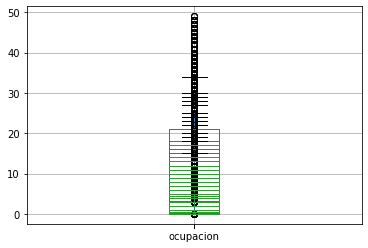

In [19]:
dataset2018_parkinglots = get_parking_lots(dataset2018).sort_values(by='Cantidad maxima de estacionados', ascending=False).reset_index(drop=True)
dataset_ws_parkinglots = get_parking_lots(dataset_ws).sort_values(by='Cantidad maxima de estacionados', ascending=False).reset_index(drop=True)
dataset2019_parkinglots = get_parking_lots(dataset2019).sort_values(by='Cantidad maxima de estacionados', ascending=False).reset_index(drop=True)

In [20]:
display(dataset2018_parkinglots)

dataset2018,id_cuadra,direccion,Cantidad maxima de estacionados,Cantidad boxplot de estacionados
0,59,Yrigoyen 655,27,19.0
1,2,General Pinto 545,26,12.0
2,11,San Martín 658,24,16.0
3,80,General Paz 447,22,18.0
4,14,Rodriguez 464,20,13.0
5,33,Sarmiento 755,20,14.0
6,60,Fuerte Independencia 349,20,11.0
7,58,Yrigoyen 847,19,13.0
8,21,Belgrano 540,19,15.0
9,13,General Pinto 343,19,17.0


In [21]:
display(dataset_ws_parkinglots)

dataset_ws,id_cuadra,direccion,Cantidad maxima de estacionados,Cantidad boxplot de estacionados
0,59,Yrigoyen 655,42,30.0
1,60,Fuerte Independencia 349,29,20.0
2,72,Maipu 453,27,16.0
3,32,Sarmiento 453,27,22.0
4,14,Rodriguez 464,27,14.0
5,75,Maipu 333,27,22.0
6,33,Sarmiento 755,26,24.0
7,82,General Paz 647,26,17.0
8,21,Belgrano 540,26,22.0
9,4,Rodriguez 552,24,22.0


In [22]:
display(dataset2019_parkinglots)

dataset2019,id_cuadra,direccion,Cantidad maxima de estacionados,Cantidad boxplot de estacionados
0,32,Sarmiento 755,49,34.0
1,10,San Martín 658,47,29.0
2,16,Belgrano 660,45,29.0
3,9,Rodriguez 654,45,21.0
4,55,Fuerte Independencia 349,43,20.0
5,58,Yrigoyen 655,41,29.0
6,5,General Pinto 759,40,28.0
7,17,Sarmiento 849,38,21.0
8,8,San Martín 560,37,20.0
9,15,San Martín 852,36,16.0


## En que momento fueron esos maximos

In [33]:
def get_date_of_max_parking_lots(df, max_parking_lots):
    d = df.copy()
    
    out = pd.DataFrame(columns=['direccion', 'fecha', 'ocupacion'])
    for s in max_parking_lots['direccion']:
        to_add = d.loc[d['direccion'] == s]
        max_for_street = max_parking_lots.loc[max_parking_lots['direccion'] == s]
        
        to_add = to_add.loc[to_add.ocupacion == max_for_street['Cantidad maxima de estacionados'].iloc[0], ['direccion', 'fecha', 'ocupacion']].iloc[0]
        out = out.append(to_add)
    
    return out.sort_values(by='ocupacion').reset_index(drop=True)

In [34]:
get_date_of_max_parking_lots(dataset2018, dataset2018_parkinglots)

,direccion,fecha,ocupacion
0,Tribunal de Faltas,2018-05-28,1
1,Av. España 359,2018-06-11,5
2,14 de Julio 767,2018-03-05,5
3,Maipu 953,2018-06-06,5
4,Av. España 647,2018-05-23,6
5,Av. España 545,2018-03-22,6
6,Alem 852,2018-02-27,7
7,14 de Julio 657,2018-03-06,7
8,Av. España 957,2018-06-05,7
9,Av. España 843,2018-03-22,7


In [35]:
get_date_of_max_parking_lots(dataset_ws, dataset_ws_parkinglots)

,direccion,fecha,ocupacion
0,Tribunal de Faltas,2019-09-12,1
1,Av. España 436,2019-09-11,4
2,Av. España 359,2019-09-18,5
3,Maipu 953,2019-10-08,6
4,Av. España 647,2019-09-11,7
5,Oficina SUMO,2019-09-13,7
6,Av. España 624,2019-09-25,7
7,Av. España 352,2019-09-27,7
8,Maipu 857,2019-10-18,7
9,Belgrano 958,2019-12-04,8


In [36]:
get_date_of_max_parking_lots(dataset2019, dataset2019_parkinglots)

,direccion,fecha,ocupacion
0,Tribunal de Faltas,2019-02-05,2
1,Av. España 359,2019-01-22,7
2,Av. España 352,2019-09-27,7
3,Av. España 436,2019-07-19,7
4,Av. España 624,2019-04-09,9
5,Maipu 953,2019-11-26,9
6,Av. España 526,2019-06-21,10
7,14 de Julio 657,2019-04-29,10
8,Av. España 545,2019-08-09,10
9,Av. España 647,2019-08-09,10


## Box plot solo del dataset2019 ya que es el mas completo

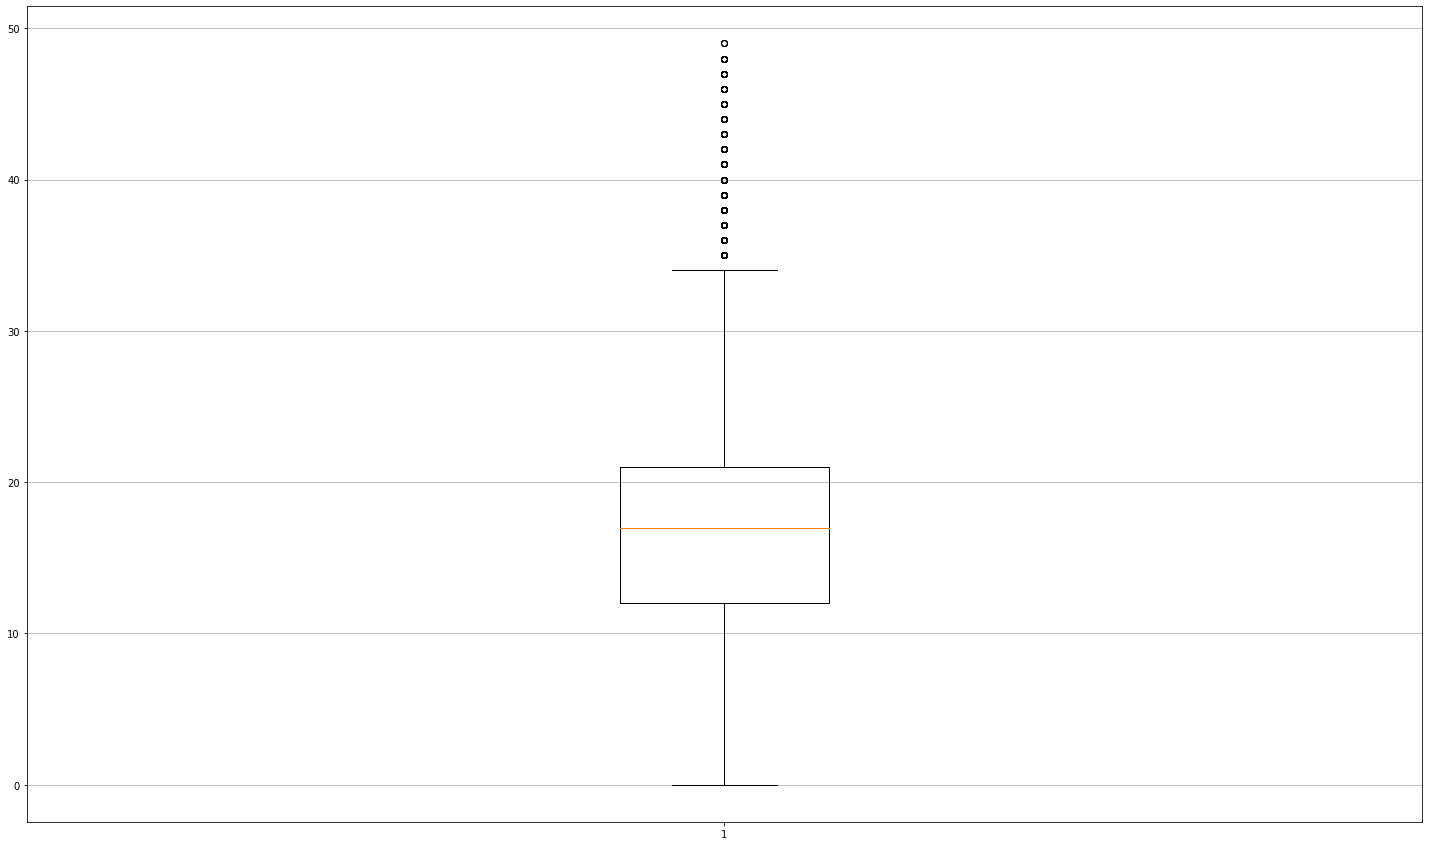

In [37]:
#Con los datos solo de la calle de mayor ocupación

plt.boxplot(dataset2019.loc[dataset2019['direccion'] == 'Sarmiento 755', 'ocupacion'])
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = (4,8)
plt.show()

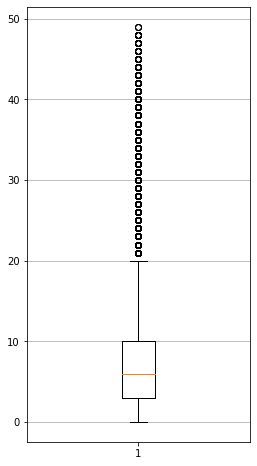

In [38]:
#Con los datos completos

b = plt.boxplot(dataset2019.ocupacion)
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = (4,8)
plt.show()

In [39]:
plt.rcParams['figure.figsize'] = (15,8)


## Grafico de barras por mes

In [40]:
def create_bar_graph_for_months(df, full_dataset, ocup_limit = 3):
    
    d = df.copy()
    d['fecha'] = d.fecha.apply(lambda x: x.month)
    d.rename({'fecha': 'mes'},  axis=1, inplace=True)
    d = d[['mes', 'ocupacion']]
    
    #Count data
    fd = full_dataset.copy()
    d1 = pd.DataFrame(columns=['fecha','ocupacion'])
    for s in df['direccion']:
        max_ocup = df.loc[df['direccion'] == s, 'ocupacion'].values[0]
        fd_street = fd.loc[fd['direccion'] == s, ['fecha', 'ocupacion']]
        fd_street = fd_street.loc[fd_street.ocupacion > max_ocup - ocup_limit]
        d1 = d1.append(fd_street)
    
    d1['fecha'] = d1.fecha.apply(lambda x: x.month)
    d1.rename({'fecha': 'mes'},  axis=1, inplace=True)
    d1 = d1[['mes', 'ocupacion']]
    d1 = d1.groupby(by=['mes']).count().reset_index()
    d1.rename({'ocupacion': 'cantidad de maximos totales'},  axis=1, inplace=True)

    #Mean parking lots data
    d2 = d.copy()
    #Handmade mean, because mean throws error
    d2 = d2.groupby(by='mes').sum().reset_index()
    d2['ocupacion'] = d.groupby(by='mes').sum().reset_index()['ocupacion']/d.groupby(by='mes').count().reset_index()['ocupacion']
    d2.rename({'ocupacion': 'promedio de los maximos'},  axis=1, inplace=True)
    
    #total operations made on each month
    d3 = full_dataset.copy()
    d3['fecha'] = d3.fecha.apply(lambda x: x.month)
    d3.rename({'fecha': 'mes'},  axis=1, inplace=True)
    d3 = d3[['mes', 'ocupacion']]
    d3 = d3.groupby(by=['mes']).count().reset_index()
    d3.rename({'ocupacion': 'operaciones totales'}, axis=1, inplace=True)
    
    #To plot graphs...
    ax = plt.subplot(111)
    ax.bar(d1['mes']-0.2, d1['cantidad de maximos totales'] / 50, width=0.2, color='brown')
    ax.bar(d2['mes'], d2['promedio de los maximos'], width=0.2, color='pink')
    ax.bar(d3['mes']+0.2, d3['operaciones totales'] / 10000, width=0.2, color='grey')
    
    plt.xlabel("Mes")
    plt.ylabel("")
    plt.title("")
    plt.legend(['Cantidad de maximos (1/50)', 'Promedio de maximos', 'Operaciones totales (1/10.000)'])

    plt.grid(axis='y')
    
    plt.show()

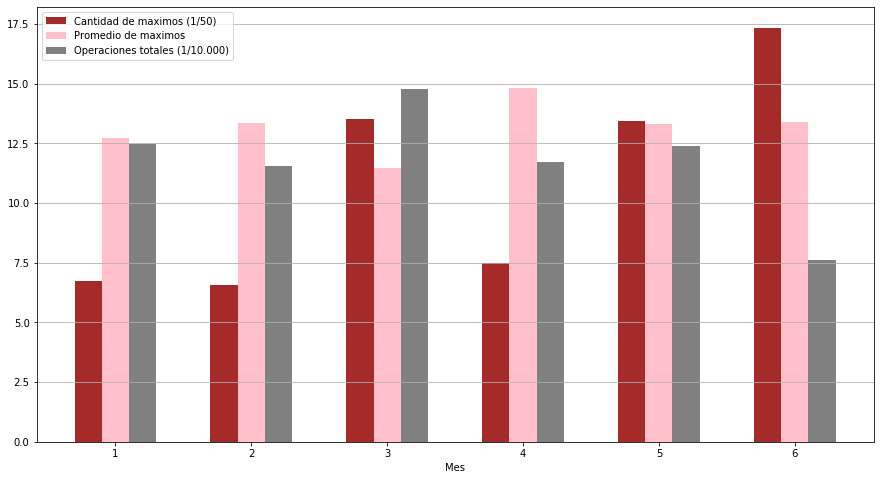

In [41]:
create_bar_graph_for_months(get_date_of_max_parking_lots(dataset2018, dataset2018_parkinglots), dataset2018)

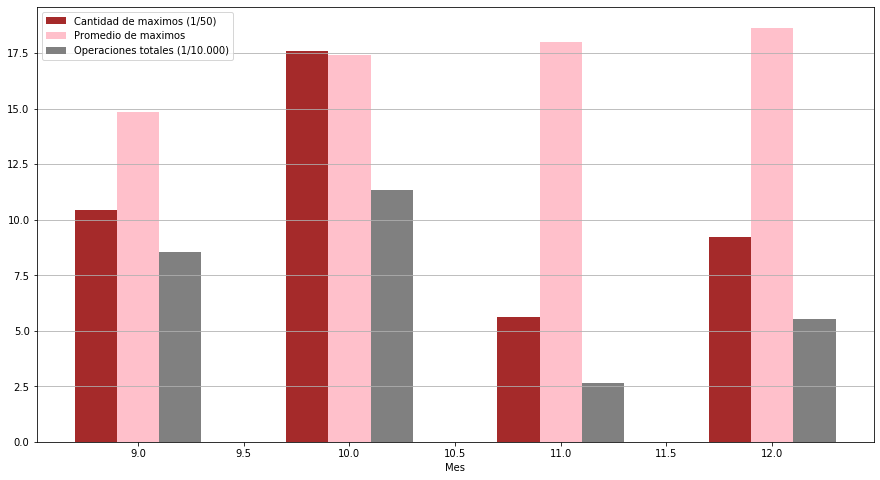

In [42]:
create_bar_graph_for_months(get_date_of_max_parking_lots(dataset_ws, dataset_ws_parkinglots), dataset_ws)

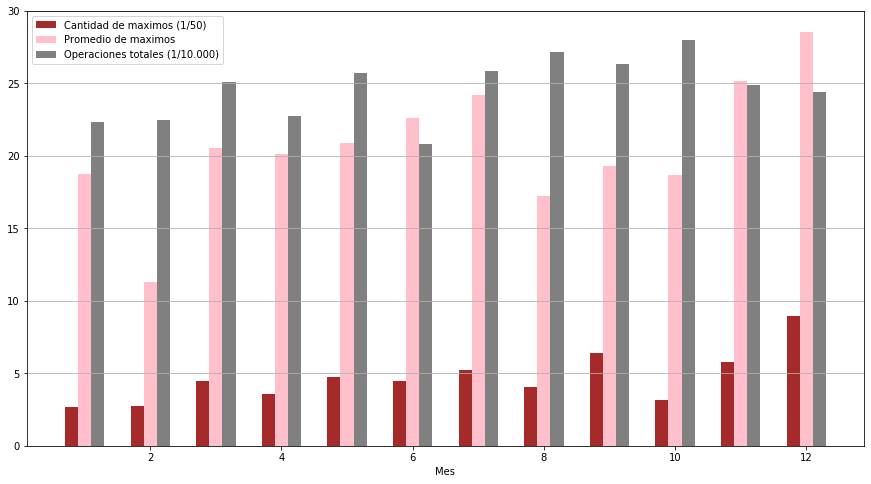

In [43]:
create_bar_graph_for_months(get_date_of_max_parking_lots(dataset2019, dataset2019_parkinglots), dataset2019)

## Cantidad de movimientos por calle

In [44]:
def traffic_density(df, by_week=False):
    d = df.copy()
    
    if not by_week:
        d = d[['direccion','ocupacion']].groupby(by=['direccion']).count().reset_index()
    else:
        #display(d)
        d = d[['dia de la semana','ocupacion']].groupby(by=['dia de la semana']).count().reset_index()
    
    d = d.rename({'ocupacion': 'operaciones totales'}, axis=1)
    d = d.sort_values(by='operaciones totales', ascending=False)
    return d.reset_index(drop=True)

In [45]:
dataset2018_traffic_density = traffic_density(dataset2018)
dataset_ws_traffic_density = traffic_density(dataset_ws)
dataset2019_traffic_density = traffic_density(dataset2019)

In [46]:
merge_values(dataset2018_traffic_density, dataset_ws_traffic_density, dataset2019_traffic_density, not_on=['operaciones totales'], on='direccion', names=['2018_', 'ws_', '2019_'])

,direccion,2018_operaciones totales,ws_operaciones totales,2019_operaciones totales
0,14 de Julio 347,4701.0,2025,20546
1,14 de Julio 467,3267.0,1767,14287
2,14 de Julio 557,3333.0,1828,15137
3,14 de Julio 657,2474.0,1357,10699
4,14 de Julio 767,1614.0,1104,8403
5,14 de Julio 847,818.0,939,4435
6,9 de Julio 345,6767.0,2746,29667
7,9 de Julio 441,16504.0,4544,58432
8,9 de Julio 753,9241.0,3939,41048
9,9 de Julio 843,4430.0,2616,23213


## Cantidad de movimientos por dia de semana

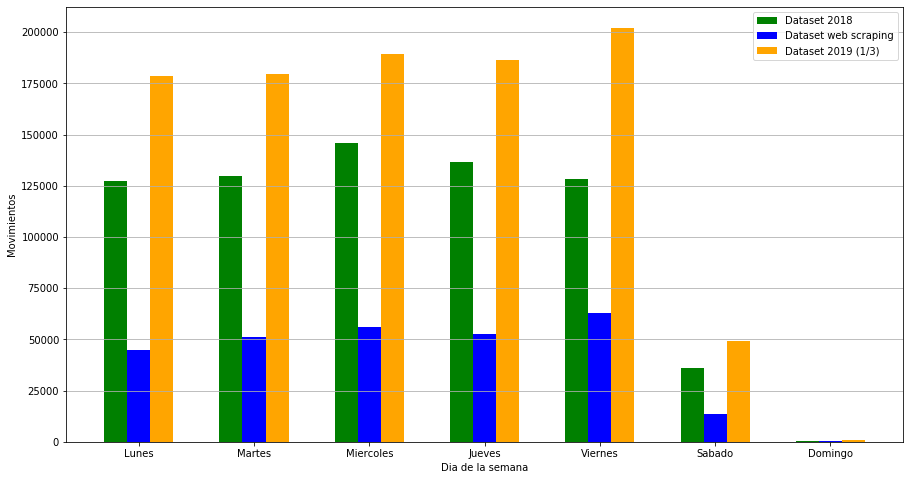

In [47]:
df1 = traffic_density(dataset2018, by_week=True)
df2 = traffic_density(dataset_ws, by_week=True)
df3 = traffic_density(dataset2019, by_week=True)

#To plot graphs...
ax = plt.subplot(111)
ax.bar(df1['dia de la semana']-0.2, df1['operaciones totales'], width=0.2, color='green')
ax.bar(df2['dia de la semana'], df2['operaciones totales'], width=0.2, color='blue')
ax.bar(df3['dia de la semana']+0.2, df3['operaciones totales'] / 3, width=0.2, color='orange')

plt.xlabel("Dia de la semana")
plt.ylabel("Movimientos")
plt.title("")
plt.legend(['Dataset 2018', 'Dataset web scraping', 'Dataset 2019 (1/3)'])

plt.grid(axis='y')

ax.set_xticklabels(['abc', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])

plt.show()

## Cantidad de movimientos por hora

In [48]:
def traffic_density_per_hour(df):
    '''
    Obtain the total operations per hour
    
    Parameters:
        df: (DataFrame) a DataFrame containing all the data or only for
        one day, e.g. only with the monday data.
        
    Returns:
        in_out_per_hour: (DataFrame) df that contains the inputs, the outputs 
        and the sub: operaciones totales.
    '''
    
    d = df.copy()
    d = d[['id_cuadra', 'direccion', 'tiempo','operacion']]
    
    d['tiempo'] = d['tiempo'].apply(lambda x: x.hour)

    #Obtain 2 df, one with the count of the inputs and the other with the count of the outputs
    in_per_hour = d.loc[d['operacion'] == 1, ['tiempo', 'operacion']].groupby(by=['tiempo']).count().reset_index()
    out_per_hour = d.loc[d['operacion'] == 0, ['tiempo', 'operacion']].groupby(by=['tiempo']).count().reset_index()
    in_per_hour.rename(columns={'operacion': 'entradas'}, inplace=True)
    out_per_hour.rename(columns={'operacion': 'salidas'}, inplace=True)

    #Merge both in and out per hour to get the diff
    in_out_per_hour = in_per_hour.merge(out_per_hour, how='outer', on=['tiempo'])
    in_out_per_hour.fillna(0, axis=1, inplace=True)

    in_out_per_hour['operaciones totales'] = in_out_per_hour['entradas'] + in_out_per_hour['salidas']
    in_out_per_hour.rename(columns={'tiempo': 'hora'}, inplace=True)
    
    return in_out_per_hour[['hora','operaciones totales']].sort_values(by='operaciones totales').reset_index(drop=True)

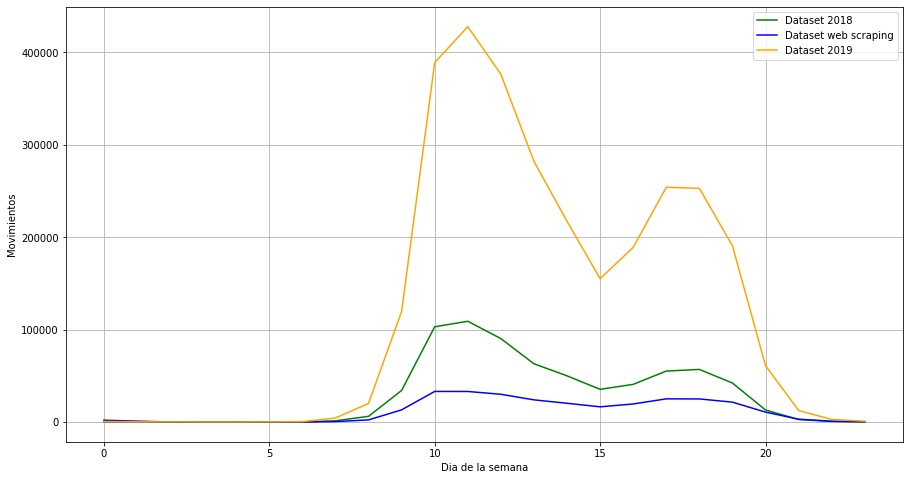

In [49]:
df1 = traffic_density_per_hour(dataset2018).sort_values(by='hora')
df2 = traffic_density_per_hour(dataset_ws).sort_values(by='hora')
df3 = traffic_density_per_hour(dataset2019).sort_values(by='hora')

def plot_traffic_density_per_hour(df1, df2, df3):

    #To plot graphs...
    ax = plt.subplot(111)
    ax.plot(df1['hora'], df1['operaciones totales'], color='green')
    ax.plot(df2['hora'], df2['operaciones totales'], color='blue')
    ax.plot(df3['hora'], df3['operaciones totales'], color='orange')

    plt.xlabel("Dia de la semana")
    plt.ylabel("Movimientos")
    plt.title("")
    plt.legend(['Dataset 2018', 'Dataset web scraping', 'Dataset 2019'])

    plt.grid()

    #ax.set_xticklabels(['abc', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])

    plt.show()

plot_traffic_density_per_hour(df1, df2, df3)

# Eleccion de calle y hora

In [50]:
street = dataset2019_traffic_density['direccion'].iloc[0]
hour = 10

print('Cuadra: ', street)
print('Hora:   ', hour)

Cuadra:  San Martín 658
Hora:    10


## Grafica de promedio de estacionamiento por mes

In [51]:
dataset2019['mes'] = dataset2019['fecha'].apply(lambda x: x.month)
dataset2019['hora'] = dataset2019['tiempo'].apply(lambda x: x.hour)

In [52]:
d = dataset2019.copy()

d = d.loc[d['direccion'] == 'Sarmiento 755']

d = d[['mes', 'hora', 'ocupacion',]]


d = d.groupby(by=['mes', 'hora']).mean().reset_index(drop=False)

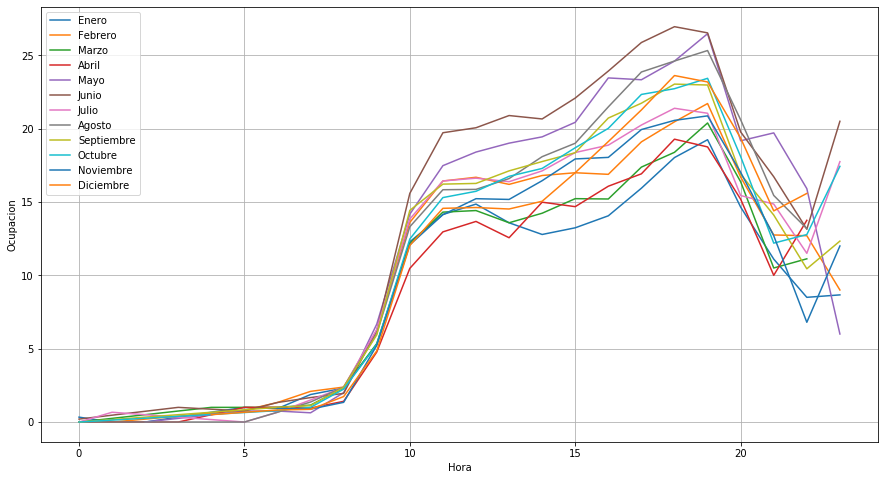

In [53]:
for i in range(1, 12+1):
    to_plot = d.loc[d['mes'] == i]
    plt.plot(to_plot['hora'], to_plot['ocupacion'])
plt.grid()
plt.rcParams['figure.figsize'] = (15,8)
plt.xlabel('Hora')
plt.ylabel('Ocupacion')
plt.legend(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

## Grafica de promedio de estacionamiento por dia de semana

In [54]:
def plot_mean_parked_cars_weekday(df, weekday=False, color=['black','blue','yellow','green','red','brown','orange']):
    '''
        Plot a line graph for the mean parked cars along a street.
        
        Parameters:
            data: (DataFrame) a DataFrame containing all the data.
            street: (int) the street to chose the data.
    '''
    
    d = df.copy()
    week = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

    d['tiempo'] = d['tiempo'].apply(lambda x: x.hour)
               
    def plot_values(d, color=['black','grey'], weekday=False):
    
        nonlocal i, week

        mean = d[['tiempo', 'ocupacion']].groupby(by='tiempo').mean().reset_index()
        mean.rename(columns={'ocupacion': 'mean_ocupacion'}, inplace=True)

        plt.plot(mean['tiempo'], mean['mean_ocupacion'], linewidth=2, color=color[0])
        
        patch = mpatches.Patch(color=color[0], label=week[i])
        return patch
    

    patches = []
    if weekday:
        for i in range(7):
            patches.append(plot_values(d.loc[d['dia de la semana']==i], color=[color[i], 'white'], weekday=weekday))
    else:
        plot_values(d)
        
    #Modify the plot size
    plt.rcParams['figure.figsize'] = (15,8)

    #plt.ylim([0,std_1.max()+2])

    #Set the label titles
    plt.xlabel('Hora')
    plt.ylabel('Autos estacionados')
    title = 'Autos estacionados en promedio.'
    
    plt.legend(handles=[patches[0], patches[1], patches[2], patches[3], patches[4], patches[5], patches[6]])

    plt.title(title)
    plt.grid()
    plt.show()

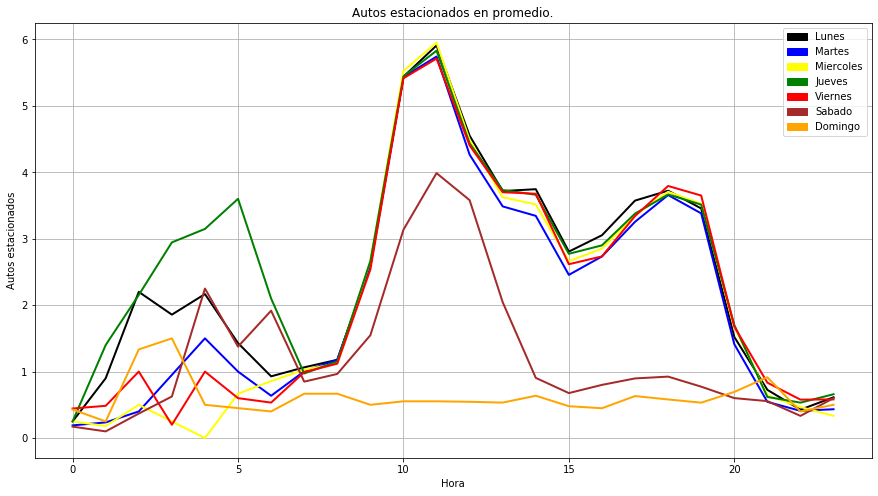

In [55]:
plot_mean_parked_cars_weekday(dataset2018, weekday=True)

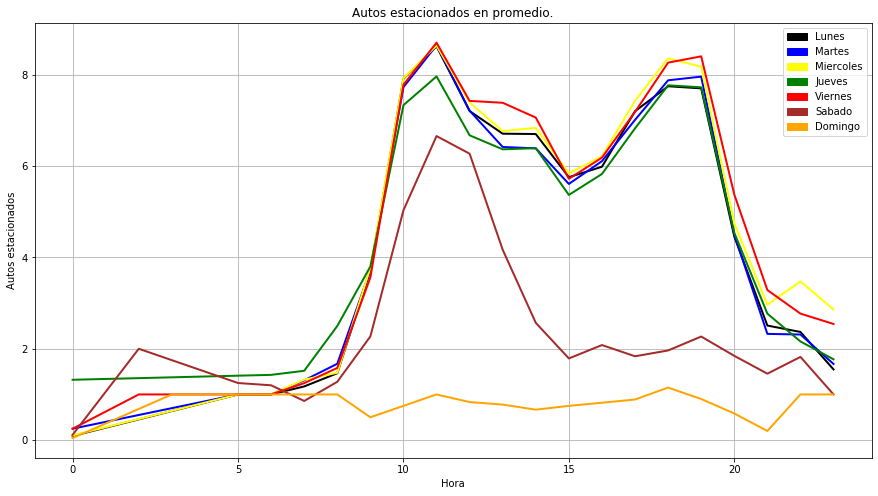

In [56]:
plot_mean_parked_cars_weekday(dataset_ws, weekday=True)

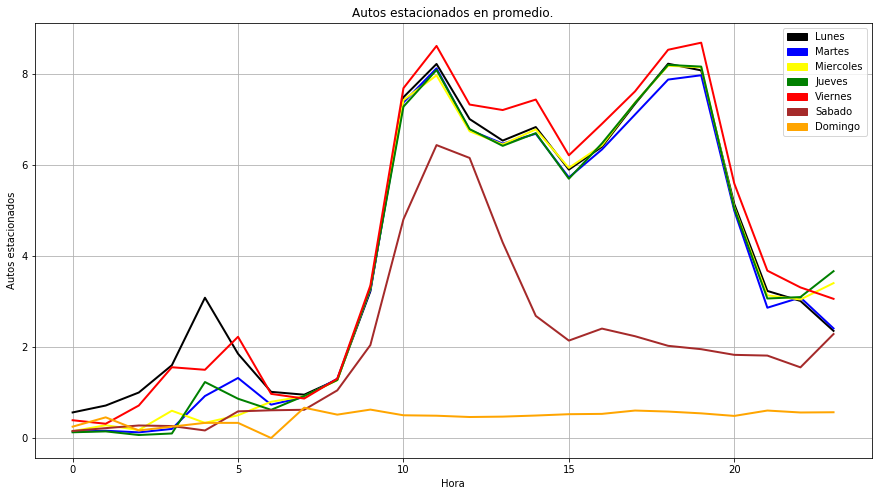

In [57]:
plot_mean_parked_cars_weekday(dataset2019, weekday=True)

In [58]:
def get_std_per_weekday(df):
    d = df.copy()
    d['tiempo'] = d['tiempo'].apply(lambda x: x.hour)
    d['fecha'] = d['fecha'].apply(lambda x: x.weekday())
    week = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']
    std = []
    for i in range(7):
        std.append(d.loc[d.fecha == i, ['tiempo', 'ocupacion']].groupby(by=['tiempo']).std().reset_index().rename({'ocupacion': 'ocupacion_{}'.format(week[i])}, axis=1))

    out = std[0]
    for i in range(1, 7):
        out = out.merge(std[i], on='tiempo')
    out = out.loc[(out.tiempo > 8) & (out.tiempo < 21)]
    return out


dataset2018_std_per_week = get_std_per_weekday(dataset2018)
dataset_ws_std_per_week = get_std_per_weekday(dataset_ws)
dataset2019_std_per_week = get_std_per_weekday(dataset2019)

In [59]:
dataset2018_std_per_week

dataset2018,tiempo,ocupacion_Lun,ocupacion_Mar,ocupacion_Mie,ocupacion_Jue,ocupacion_Vie,ocupacion_Sab,ocupacion_Dom
7,9,1.808111,1.829883,1.879523,1.889317,1.744852,1.145327,0.516398
8,10,3.113535,3.218308,3.273841,3.192336,3.084847,2.280472,0.554947
9,11,3.386238,3.275057,3.436575,3.371699,3.221506,2.612164,0.503897
10,12,2.784432,2.702985,2.807677,2.823277,2.682536,2.698585,0.547916
11,13,2.540899,2.483674,2.409388,2.560526,2.477055,1.899857,0.507416
12,14,2.653965,2.417905,2.395291,2.606028,2.521741,1.098725,0.685087
13,15,2.236877,1.951667,2.034953,2.261881,1.965403,0.859464,0.504852
14,16,2.411560,2.021937,2.174719,2.277433,2.010628,0.815005,0.506120
15,17,2.551605,2.210464,2.307659,2.257163,2.219944,0.796147,0.541322
16,18,2.372223,2.310706,2.345778,2.243291,2.344440,0.800648,0.559519


In [60]:
dataset_ws_std_per_week

dataset_ws,tiempo,ocupacion_Lun,ocupacion_Mar,ocupacion_Mie,ocupacion_Jue,ocupacion_Vie,ocupacion_Sab,ocupacion_Dom
2,9,2.635798,2.698539,2.546701,2.634598,2.380825,1.691606,0.707107
3,10,4.493961,4.332587,4.276838,4.152809,4.068029,3.637500,0.500000
4,11,4.604662,4.711503,4.404864,4.326704,4.333554,4.454169,0.000000
5,12,3.788567,3.983471,3.903640,3.721142,3.873099,4.236794,0.752773
6,13,3.725316,3.577629,3.752465,3.758370,3.957575,3.294247,0.666667
7,14,3.788673,3.616044,3.710438,3.884650,3.805180,2.654425,0.577350
8,15,3.581705,3.359799,3.510433,3.433790,3.358827,1.534894,0.707107
9,16,3.739696,3.521610,3.575859,3.595179,3.556063,2.092129,0.603023
10,17,4.222621,3.659593,4.260430,3.860146,4.083486,1.263609,0.333333
11,18,4.247487,4.031892,4.589166,4.547872,4.723227,1.503427,0.988087


In [61]:
dataset2019_std_per_week

dataset2019,tiempo,ocupacion_Lun,ocupacion_Mar,ocupacion_Mie,ocupacion_Jue,ocupacion_Vie,ocupacion_Sab,ocupacion_Dom
9,9,2.376097,2.389950,2.357653,2.332905,2.464072,1.690101,0.489246
10,10,4.333780,4.171343,4.150660,4.162071,4.210126,3.579153,0.516640
11,11,4.843098,4.678748,4.649033,4.692609,4.807766,4.391367,0.526127
12,12,4.915870,4.756830,4.652236,4.643107,5.043052,4.717509,0.510725
13,13,5.243001,5.084056,4.950803,4.993280,5.529547,4.394774,0.520964
14,14,5.745917,5.440432,5.389206,5.482220,5.944063,3.688015,0.545153
15,15,5.505822,5.051755,5.186310,5.186005,5.699677,3.009765,0.532380
16,16,5.585673,5.196695,5.273605,5.388987,5.978196,3.012925,0.536527
17,17,5.770816,5.386733,5.583518,5.706455,6.073068,2.767675,0.585177
18,18,6.258208,5.819144,6.043081,6.177063,6.565963,2.370442,0.601675


## Grafica de promedio de estacionamiento a lo largo del dia

In [62]:
# Se eliminan los sabados y los domingos ya que generan ruido en los datos normales. Esto sucede ya que
# el estacionamiento los sabados funciona hasta el mediodia y el domingo no funciona.

df1 = dataset2018.loc[dataset2018['dia de la semana'] < 5]
df2 = dataset_ws.loc[dataset_ws['dia de la semana'] < 5]
df3 = dataset2019.loc[dataset2019['dia de la semana'] < 5]

C:\Users\ing_l\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


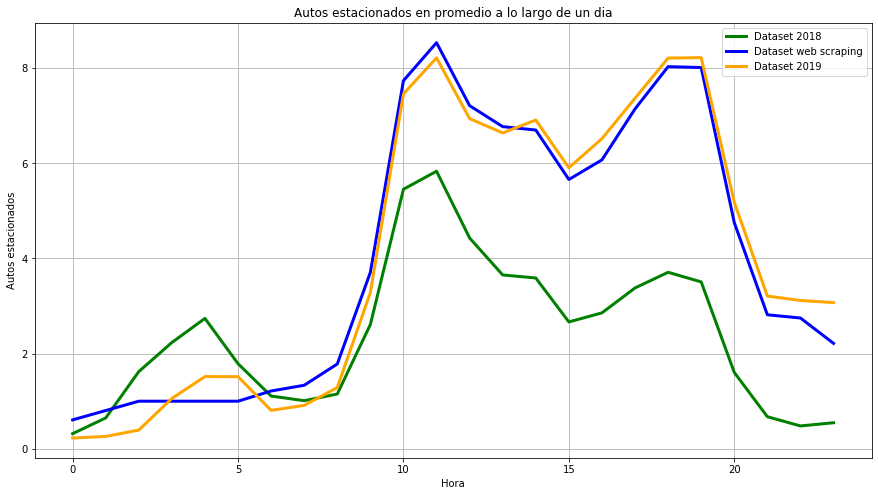

In [63]:
def plot_mean_parked_cars(df1, df2, df3):
    '''
        Plot a line graph for the mean parked cars along a street.
        
        Parameters:
            data: (DataFrame) a DataFrame containing all the data.
            street: (int) the street to chose the data.
    '''
    
    d1 = df1.copy()
    d2 = df2.copy()
    d3 = df3.copy()
    
    d1['tiempo'] = d1['tiempo'].apply(lambda x: x.hour)
    d2['tiempo'] = d2['tiempo'].apply(lambda x: x.hour)
    d3['tiempo'] = d3['tiempo'].apply(lambda x: x.hour)
            
    mean1 = d1[['tiempo', 'ocupacion']].groupby(by='tiempo').mean().reset_index()
    mean2 = d2[['tiempo', 'ocupacion']].groupby(by='tiempo').mean().reset_index()
    mean3 = d3[['tiempo', 'ocupacion']].groupby(by='tiempo').mean().reset_index()

    mean1.rename(columns={'ocupacion': 'mean_ocupacion'}, inplace=True)
    mean2.rename(columns={'ocupacion': 'mean_ocupacion'}, inplace=True)
    mean3.rename(columns={'ocupacion': 'mean_ocupacion'}, inplace=True)
               
    #Modify the plot size
    plt.rcParams['figure.figsize'] = (15,8)
    
    #Set the label titles
    plt.xlabel('Hora')
    plt.ylabel('Autos estacionados')
    title = 'Autos estacionados en promedio a lo largo de un dia'
    
    plt.title(title)

    #Set the plot data for each graph (ax1,ax2,ax3)
    ax = plt.subplot(111)
    ax.plot(mean1['tiempo'], mean1['mean_ocupacion'], linewidth=3, color='green')
    ax.plot(mean2['tiempo'], mean2['mean_ocupacion'], linewidth=3, color='blue')
    ax.plot(mean3['tiempo'], mean3['mean_ocupacion'], linewidth=3, color='orange')
    
    plt.legend(['Dataset 2018', 'Dataset web scraping', 'Dataset 2019'])
    plt.grid()
    plt.show()
    
plot_mean_parked_cars(df1, df2, df3)

## In outs por hora

In [64]:
def inputs_outputs_per_hour(df, street=None):
    '''
    Obtain the inputs and outputs (and the sub of both) per street.
    
    Parameters:
        df: (DataFrame) a DataFrame containing all the data or only for
        one day, e.g. only with the monday data.
        
    Returns:
        in_out_per_hour: (DataFrame) df that contains the inputs, the outputs 
        and the sub: entradas-salidas.
    '''
    
    d = df.copy()
    d = d[['id_cuadra', 'direccion', 'tiempo','operacion']]
    
    if street is not None:
        d = d.loc[d.direccion == street]
    
    d['tiempo'] = d['tiempo'].apply(lambda x: x.hour)

    #Obtain 2 df, one with the count of the inputs and the other with the count of the outputs
    in_per_hour = d.loc[d['operacion'] == 1, ['tiempo', 'operacion']].groupby(by=['tiempo']).count().reset_index()
    out_per_hour = d.loc[d['operacion'] == 0, ['tiempo', 'operacion']].groupby(by=['tiempo']).count().reset_index()
    in_per_hour.rename(columns={'operacion': 'entradas'}, inplace=True)
    out_per_hour.rename(columns={'operacion': 'salidas'}, inplace=True)

    #Merge both in and out per hour to get the diff
    in_out_per_hour = in_per_hour.merge(out_per_hour, how='outer', on=['tiempo'])
    in_out_per_hour.fillna(0, axis=1, inplace=True)

    in_out_per_hour['entradas - salidas'] = in_out_per_hour['entradas'] - in_out_per_hour['salidas']
    in_out_per_hour.rename(columns={'tiempo': 'hora'}, inplace=True)
    
    return in_out_per_hour[['hora','entradas - salidas']].sort_values(by='entradas - salidas').reset_index(drop=True)

In [65]:
df1 = inputs_outputs_per_hour(dataset2018)
df2 = inputs_outputs_per_hour(dataset_ws)
df3 = inputs_outputs_per_hour(dataset2019)

display(merge_values(df1, df2, df3, not_on=['entradas - salidas'], on=['hora'])[0:])

,hora,2018_entradas - salidas,ws_entradas - salidas,2019_entradas - salidas
0,0,-69,-1178.0,-361
1,1,-67,NaN,-175
2,2,-7,0.0,-67
3,3,4,1.0,-34
4,4,2,NaN,1
5,5,-9,5.0,24
6,6,27,11.0,76
7,7,895,283.0,2263
8,8,3187,1278.0,10115
9,9,18792,9504.0,65903


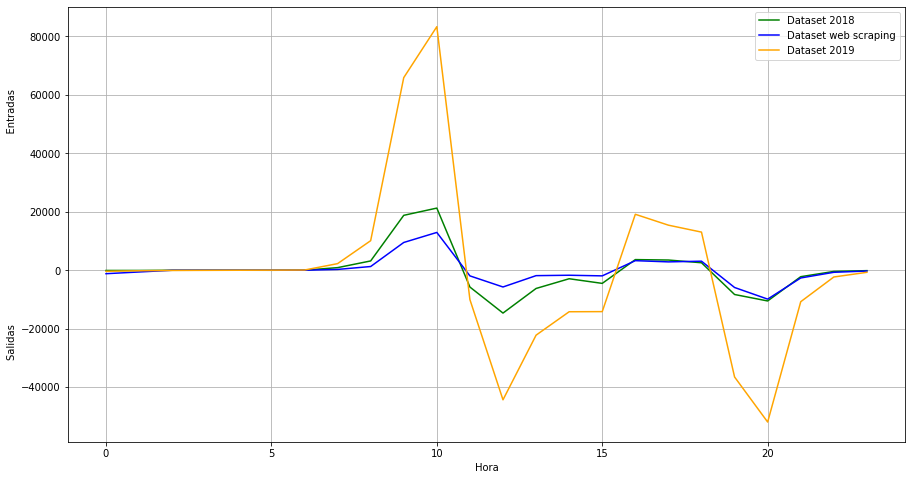

In [66]:
df1 = inputs_outputs_per_hour(dataset2018).sort_values(by='hora')
df2 = inputs_outputs_per_hour(dataset_ws).sort_values(by='hora')
df3 = inputs_outputs_per_hour(dataset2019).sort_values(by='hora')

def plot_in_outs_per_hour(df1, df2, df3):
    ax = plt.subplot(111)
    ax.plot(df1['hora'], df1['entradas - salidas'], color='green')
    ax.plot(df2['hora'], df2['entradas - salidas'], color='blue')
    ax.plot(df3['hora'], df3['entradas - salidas'], color='orange')

    plt.xlabel("Hora")
    plt.ylabel("Salidas                                                             Entradas")
    plt.title("")
    plt.legend(['Dataset 2018', 'Dataset web scraping', 'Dataset 2019'])

    plt.grid()
    plt.show()

plot_in_outs_per_hour(df1, df2, df3)

## Heat map

In [67]:
plt.rcParams['figure.figsize'] = (15,8)


In [68]:
def get_data_to_plot(data, hour):
    '''
    
    '''
    d = data.copy()
    d = d.loc[d.direccion != 'Oficina SUMO'].reset_index(drop=True)
    d = d.loc[d.direccion != 'Tribunal de Faltas'].reset_index(drop=True)
    d = d[['id_cuadra','tiempo', 'fecha', 'direccion', 'ocupacion', 'latitud', 'longitud']]
    d['tiempo'] = d['tiempo'].apply(lambda x: x.hour)
    d = d.loc[d['tiempo'] == hour]
    d = d.groupby(by=['id_cuadra', 'direccion']).mean().reset_index()
    return d
    
    
def get_color_to_plot(data, max_ocupation, colors=['green','yellow','orange','red'], by='Cantidad promedio de estacionados'):
    '''
    
    '''
    d = data.copy()
    max_ocup = max_ocupation.copy()
    d = d.loc[d.direccion != 'Oficina SUMO'].reset_index(drop=True)
    d = d.loc[d.direccion != 'Tribunal de Faltas'].reset_index(drop=True)
    max_ocup = max_ocup.loc[max_ocup.direccion != 'Oficina SUMO'].reset_index(drop=True)
    max_ocup = max_ocup.loc[max_ocup.direccion != 'Tribunal de Faltas'].reset_index(drop=True)
    
    #display(d)
    #display(max_ocup)
    grade_1 = d['ocupacion'] <= (max_ocup[by] * 1/4)
    grade_2 = (~grade_1) & (d['ocupacion'] <= (max_ocup[by] * 2/4))
    grade_3 = (~grade_1) & (~grade_2) & (d['ocupacion'] <= (max_ocup[by] * 3/4))
    grade_4 = (~grade_1) & (~grade_2) & (~grade_3)

    color_data = pd.DataFrame(index=d.index.values, columns=['color'])
    color_data[grade_1] = colors[0]
    color_data[grade_2] = colors[1]
    color_data[grade_3] = colors[2]
    color_data[grade_4] = colors[3]

    color_list = []
    for c in color_data.values:
        color_list.append(c[0])

    color_data = color_list
    
    return color_data

import matplotlib.patches as mpatches

def plot_scatter_map(data, colour, date=None):

    plt.scatter(data['latitud'], data['longitud'], c=colour, s=70)
    plt.title('Mapa de calor en la hora: {}'.format(10))
    plt.axis('off')
    plt.rcParams['figure.figsize'] = (25,15)

    green_patch = mpatches.Patch(color='green', label='< 1/4 max')
    yellow_patch = mpatches.Patch(color='yellow', label='1/4 max < x < 1/2 max')
    orange_patch = mpatches.Patch(color='orange', label='1/4 max < x < 3/4 max')
    red_patch = mpatches.Patch(color='red', label='> 3/4 max')
    
    plt.legend(handles=[green_patch, yellow_patch, orange_patch, red_patch])
    plt.show()

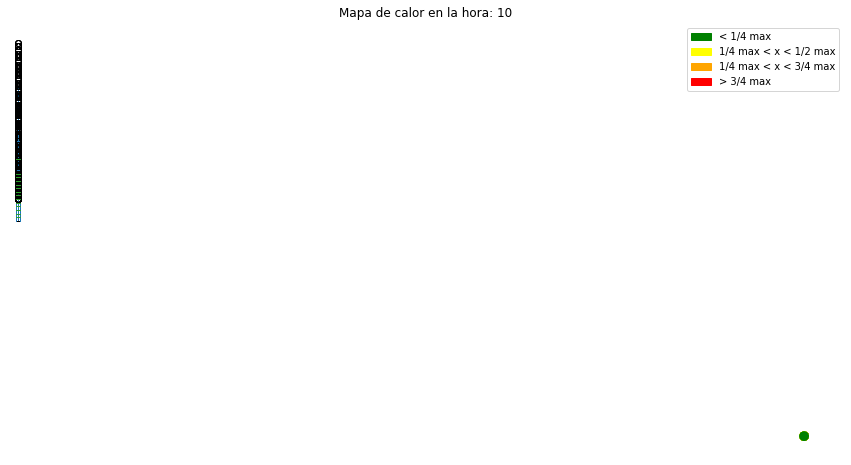

In [69]:
#Con cantidad maxima de estacionados

dataset2019_without_sat_sun = dataset2019.loc[dataset2019['dia de la semana'] < 5]

plot_data = get_data_to_plot(dataset2019_without_sat_sun, 10)

dataset2019_parkinglots_without_sat_sun = get_parking_lots(dataset2019_without_sat_sun).sort_values(by='Cantidad maxima de estacionados', ascending=False).reset_index(drop=True)
plot_color = get_color_to_plot(plot_data, dataset2019_parkinglots_without_sat_sun, by='Cantidad maxima de estacionados')

plot_data['latitud'] = plot_data['latitud'] * -1

#plot_data
plot_scatter_map(plot_data, plot_color)

In [72]:
dataset2019

dataset2019,id_cuadra,direccion,fecha,tiempo,operacion,ocupacion,latitud,longitud,dia de la semana,mes,hora
0,16,Belgrano 660,2019-01-01,10:55:00,0,0,-37.328618,-59.134464,1,1,10
7,1,General Pinto 545,2019-01-01,15:12:00,1,1,-37.327857,-59.136795,1,1,15
9,65,Rodriguez 348,2019-01-01,15:13:00,1,1,-37.329556,-59.134932,1,1,15
8,1,General Pinto 545,2019-01-01,15:15:00,0,0,-37.327857,-59.136795,1,1,15
10,65,Rodriguez 348,2019-01-01,16:22:00,0,0,-37.329556,-59.134932,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...
2957257,18,Sarmiento 543,2019-12-31,19:45:00,1,4,-37.325463,-59.138244,1,12,19
2957258,18,Sarmiento 543,2019-12-31,19:46:00,0,3,-37.325463,-59.138244,1,12,19
2956381,24,Belgrano 364,2019-12-31,19:53:00,1,1,-37.330051,-59.138285,1,12,19
2956511,60,Chacabuco 357,2019-12-31,20:08:00,0,0,-37.330374,-59.137451,1,12,20


KeyError: 'Cantidad promedio de estacionados'

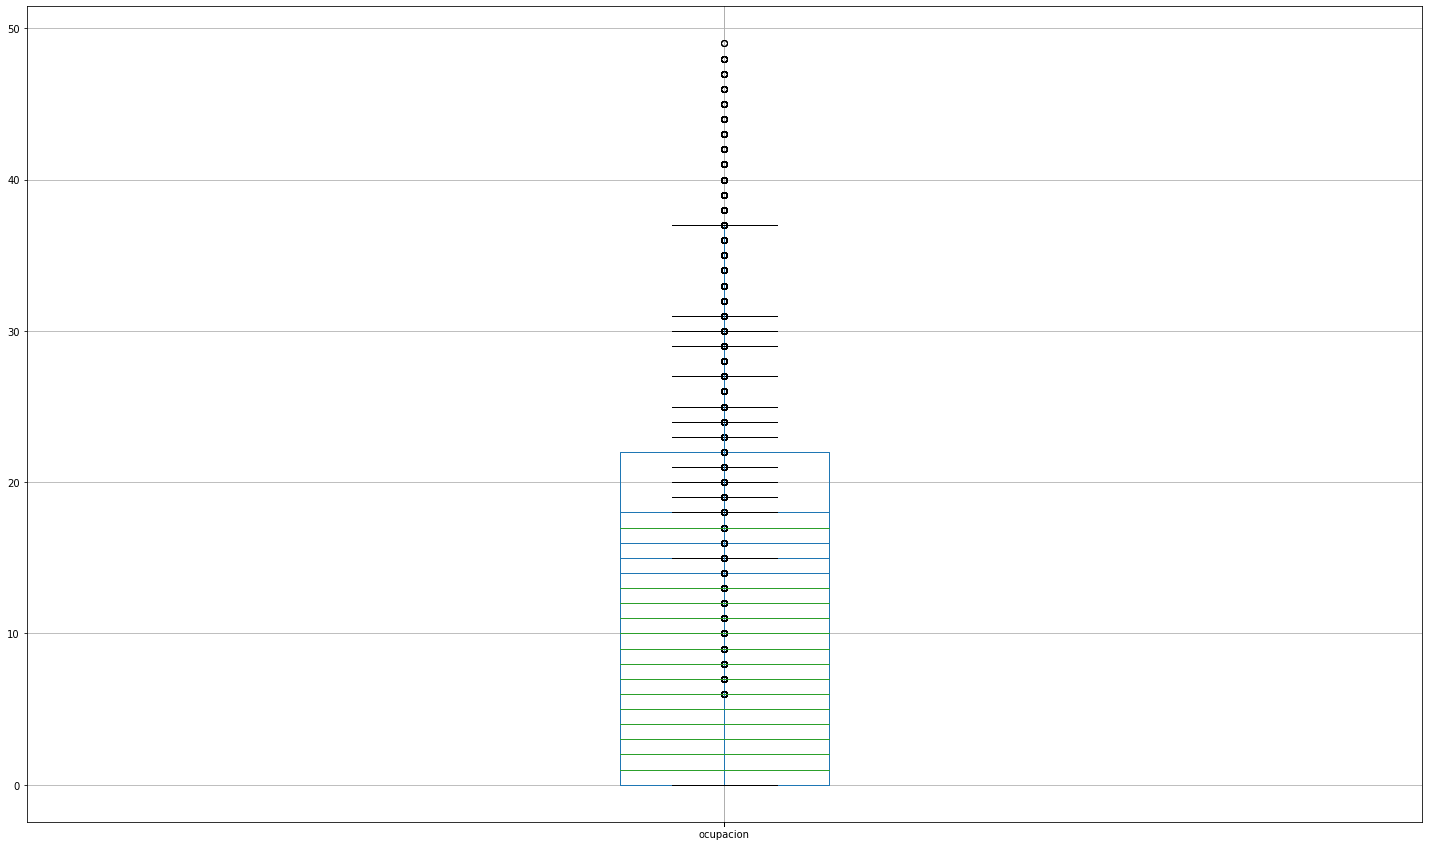

In [71]:
#Con promedio de maximo de estacionados

dataset2019_without_sat_sun = dataset2019.loc[dataset2019['dia de la semana'] < 5]

plot_data = get_data_to_plot(dataset2019_without_sat_sun, 10)

dataset2019_parkinglots_without_sat_sun = get_parking_lots(dataset2019_without_sat_sun).sort_values(by='Cantidad boxplot de estacionados', ascending=False).reset_index(drop=True)
plot_color = get_color_to_plot(plot_data, dataset2019_parkinglots_without_sat_sun)

plot_data['latitud'] = plot_data['latitud'] * -1

#plot_data
plot_scatter_map(plot_data, plot_color)

## Balance de clases para un clasificador

In [ ]:
def print_balanced_classes(df):
    d = df.copy()
    d = d.groupby(by='operacion').count()[['id_cuadra']]
    d.rename(columns={'id_cuadra': 'Cantidad datos'}, inplace=True)
    if pow(pow(d.iloc[0].values - d.iloc[1].values, 2), 0.5) > (len(df) * 0.4):
        print('Clases no balanceadas.')
    else:
        print('Clases balanceadas.')
    display(d)
    
print_balanced_classes(dataset2018)
print_balanced_classes(dataset_ws)
print_balanced_classes(dataset2019)

In [ ]:
import gc
gc.collect()